# Importing the libraries

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Chosen Numbers for Binary Classification

In [106]:
chosen_number = 1

# Training and Test Sets Data Path

In [107]:
train_data_path = 'DigitsTraining.csv'
test_data_path = 'DigitsTesting.csv'

# Importing the dataset

In [108]:
digits_training_df = pd.read_csv(train_data_path, header=None)
digits_testing_df = pd.read_csv(test_data_path, header=None)

# Remove the Dependent Variable from Train and Test Data

In [109]:
train_data = digits_training_df.iloc[:, 1:]
test_data = digits_testing_df.iloc[:, 1:]

In [110]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,1.0,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.8155,0.0690,0.5835,...,0.3480,0.0885,0.0000,0.2590,0.7370,0.9955,1.0000,1.0000,1.000,1.0
1,1.0,1.0,1.0,0.9065,0.8355,0.9045,0.9435,0.8355,0.9265,1.0000,...,0.8355,0.8355,0.5165,0.1195,0.1190,0.4370,0.5475,0.8355,0.914,1.0
2,1.0,1.0,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9980,...,1.0000,1.0000,1.0000,0.5545,0.0000,0.5895,1.0000,1.0000,1.000,1.0
3,1.0,1.0,1.0,1.0000,1.0000,0.6365,0.1580,0.0200,0.2750,0.5335,...,0.6590,0.0000,0.2320,0.9935,1.0000,1.0000,1.0000,1.0000,1.000,1.0
4,1.0,1.0,1.0,1.0000,1.0000,0.9640,0.6020,0.1245,0.2670,0.3830,...,0.2670,0.1805,0.0000,0.0000,0.1045,0.2805,0.5995,0.9415,1.000,1.0


In [111]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,1.0,1.0,1.0,1.0000,1.00,0.974,0.7805,0.426,0.308,0.0480,...,1.0000,0.9540,0.2850,0.189,0.9865,1.0000,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0000,1.00,1.000,1.0000,1.000,1.000,1.0000,...,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,0.7965,0.15,0.000,0.0000,0.000,0.000,0.0735,...,0.0000,0.1415,0.3335,0.419,0.6965,1.0000,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0000,1.00,1.000,1.0000,1.000,1.000,1.0000,...,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0000,1.00,1.000,1.0000,0.929,0.553,0.0990,...,0.0495,0.0495,0.0495,0.355,0.6845,0.9335,1.0,1.0,1.0,1.0


# Extract Features from The Images: Average Intensity and Symmetry

In [112]:
def extract_features(image_row):
    # Get the image (16x16)
    image = image_row.values.reshape(16, 16)

    # Average intensity
    avg_intensity = np.mean(image)
    
    # Vertical symmetry
    vertical_flipped_image = np.flipud(image)
    
    Sv = np.sum(np.abs(image - vertical_flipped_image)) / 256
    
    # Horizontal symmetry
    horizontal_flipped_image = np.fliplr(image)
    Sh = np.sum(np.abs(image - horizontal_flipped_image)) / 256
    
    # Overall symmetry
    symmetry = (Sh + Sv) / 2
    
    return np.array([avg_intensity, symmetry])

# Prepare training and testing features

In [113]:
X_train = np.array([extract_features(row) for _, row in train_data.iterrows()])
# Binary classification to distinguish the chosen number from other numbers
y_train = np.where(digits_training_df.iloc[:, 0] == chosen_number, 1, -1) 

X_test = np.array([extract_features(row) for _, row in test_data.iterrows()])
# Binary classification to distinguish the chosen number from other numbers
y_test = np.where(digits_testing_df.iloc[:, 0] == chosen_number, 1, -1)  

In [114]:
X_train

array([[0.6589082 , 0.28305859],
       [0.55586914, 0.34355078],
       [0.76899805, 0.18042188],
       ...,
       [0.60629492, 0.18257422],
       [0.40241016, 0.14112891],
       [0.7237793 , 0.05726563]])

In [115]:
y_train

array([-1, -1, -1, ..., -1, -1,  1])

In [116]:
X_test

array([[0.72782227, 0.30299609],
       [0.73486719, 0.318875  ],
       [0.66407422, 0.18259766],
       ...,
       [0.69114258, 0.33532422],
       [0.4900293 , 0.125625  ],
       [0.81102344, 0.04883203]])

In [117]:
y_test

array([-1, -1, -1, ..., -1, -1,  1])

# Training the Simple Linear Regression model on the Training set

In [118]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Test set results

In [119]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Converting predictions to binary classification (-1 or 1)
y_train_pred_class = np.where(y_train_pred >= 0, 1, -1)
y_test_pred_class = np.where(y_test_pred >= 0, 1, -1)


# Calculate Ein (In-sample error) and Eout (Out-of-sample error)

In [120]:
Ein = np.mean(y_train_pred_class != y_train)
Eout = np.mean(y_test_pred_class != y_test)

In [121]:
Ein

0.01522424907420107

In [122]:
Eout

0.0229197807673144

# Visualising the Training set results

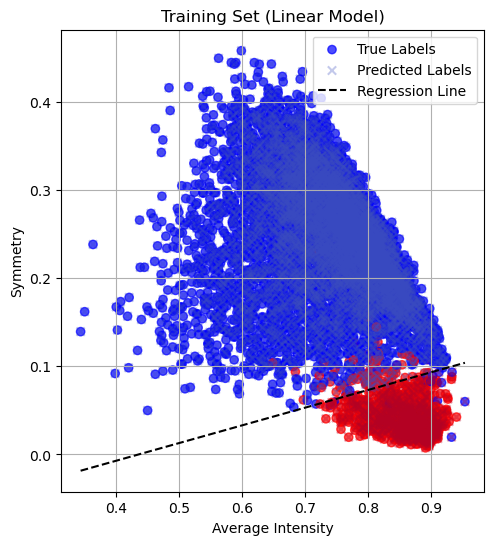

In [123]:
plt.figure(figsize=(12, 6))

# Define a range of values for the x-axis (average intensity)
x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)

# Calculate the corresponding y values (symmetry) for the regression line
# The line equation is of the form: y = -(w0 + w1*x) / w2
intercept = regressor.intercept_
coefficients = regressor.coef_
y_range = -(coefficients[0] * x_range + intercept) / coefficients[1]

# Training set visualization
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.7, label='True Labels')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred_class, cmap='coolwarm', alpha=0.3, marker='x', label='Predicted Labels')
plt.plot(x_range, y_range, color='black', linestyle='--', label='Regression Line')  # Add the regression line
plt.title('Training Set (Linear Model)')
plt.xlabel('Average Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.grid(True)

# Visualising the Test set results

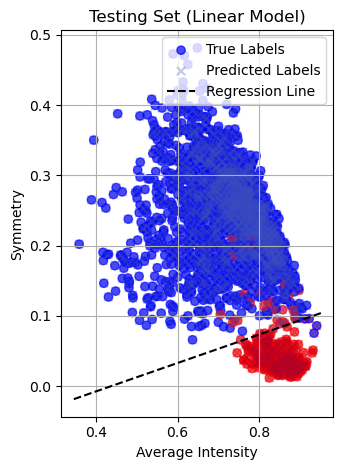

In [124]:
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.7, label='True Labels')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred_class, cmap='coolwarm', alpha=0.3, marker='x', label='Predicted Labels')
plt.plot(x_range, y_range, color='black', linestyle='--', label='Regression Line')  # Add the regression line
plt.title('Testing Set (Linear Model)')
plt.xlabel('Average Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()